### This data is giving by RBSN school for Learning Purpose alone. (Churn_Modeling)
#### Churn modeling is the process of using data and machine learning (ML) to predict whether a customer is likely to stop using a service or product (churn). It is widely used by businesses such as telecom companies, banks, and subscription services to understand customer behavior, retain customers, and reduce churn rates. 

### Here is a step-by-step breakdown of the churn modeling process using machine learning:
#### ⁠Define the Problem
#### Identify the business problem: Predict customer churn to improve retention.
#### ⁠.Data Collection
#### .Data preprocessing
#### .Split Data into Training and Testing sets
#### .Choose Machine Learning Algorithm
#### .Train the Model
#### .Evaluate the Model
#### .Tune Hyperparameters
#### .Feature Selection
#### .Deploy the Model
#### .monitor the Model
#### .Take Business Actions
#### .Iterate and improve if Needed.

### Importing Liberaries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as m

In [16]:
!pip install tensorflow

In [17]:
import tensorflow as tf

In [65]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [66]:
df = pd.read_csv("Churn_Modelling.csv")

In [67]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [68]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [69]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [71]:
df.isnull()#if you want to show everything in the datasets, you can use this function to check for null values.

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [72]:
print("n\missing values:")
print(df.isnull().sum())  # if you want to minimize space, you can use this function.

n\missing values:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [73]:
df.shape

(10000, 14)

In [74]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [75]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [76]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [77]:
df.HasCrCard.unique()

array([1, 0])

In [78]:
df.IsActiveMember.unique()

array([1, 0])

In [79]:
df.Exited.unique()

array([1, 0])

In [80]:
# This gives candidate predictors
x = df.iloc[:,3: -1].values

# This gives the predicted values
y = df.iloc[:, -1].values

#### In this project will only considered other colums except (Rownumber, customerID and surname) which and not relevant.
## Visualizing the data

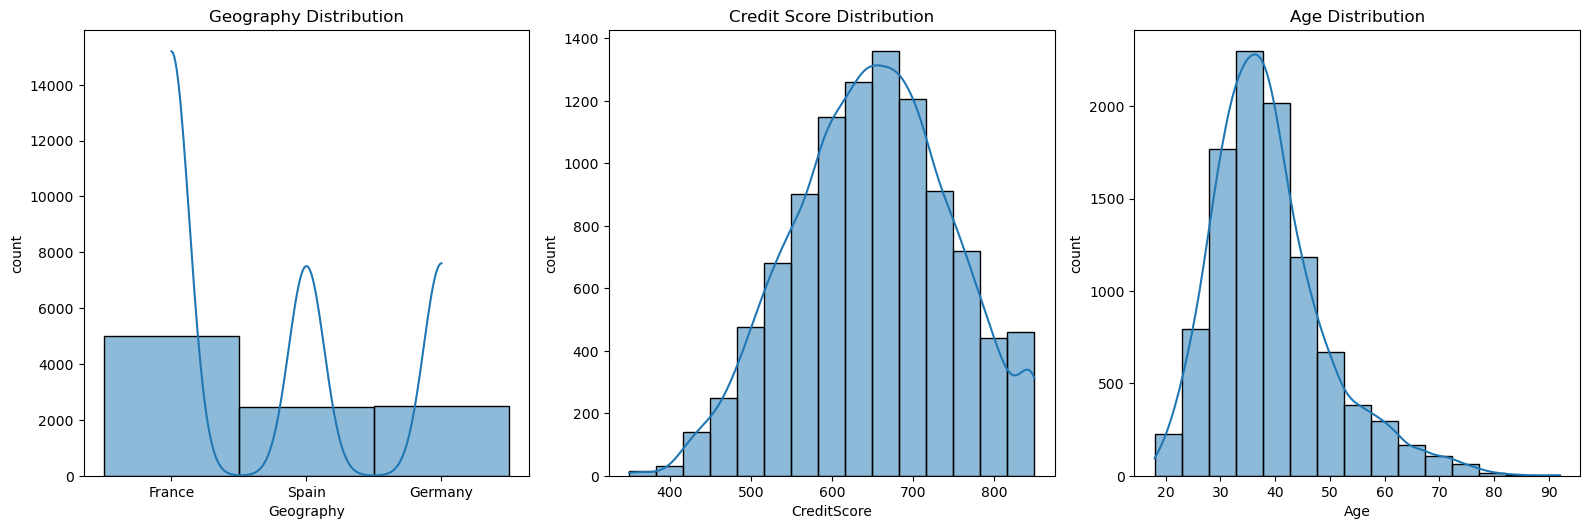

In [81]:
plt.figure(figsize=(16, 10))

# Geography distribution
plt.subplot(2, 3, 1)
sns.histplot(df['Geography'], bins=15, kde=True)
plt.xlabel('Geography')
plt.ylabel('count')
plt.title('Geography Distribution')


# Age Distribution
plt.subplot(2, 3, 3)
sns.histplot(df['Age'], bins=15, kde=True)
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Age Distribution')


# Credit Score Distribution
plt.subplot(2, 3, 2)
sns.histplot(df['CreditScore'], bins=15, kde=True)
plt.xlabel('CreditScore')
plt.ylabel('count')
plt.title('Credit Score Distribution')

plt.tight_layout()
plt.show()

## Encoding Categorical Data

In [82]:
le = LabelEncoder()

# Encoding Gender Colume
x[:, 2] = le.fit_transform(x[:, 2])

# One hot encoding the geography column
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse_output=False), [1])], remainder='passthrough')
x = ct.fit_transform(x)

print(x)
print(y)

# view encoded data below

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]
[1 0 1 ... 1 1 0]


## Splitting the Data into Trainning and Testing sets

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Scale the Features

In [86]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Build the model

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout

In [90]:
model = Sequential([
    # 1st hidden layer with 64 neurons
    Dense(units=64, activation='relu'),
    Dropout(0.5),
    # 2nd hidden layer with 32 neurons
    Dense(units=32, activation='relu'),
    Dropout(0.5),
    # Output layer with 1 neuron
    Dense(units=1, activation='sigmoid')
    
])

## Compile Model

In [92]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [95]:
# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (32, 64)               │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (32, 64)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 32)               │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (32, 32)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (32, 1)                │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,837 (34.52 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,892 (23.02 KB)

## Train the Model

In [94]:
history = model.fit(
    x_train, y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7620 - loss: 0.5576 - val_accuracy: 0.8050 - val_loss: 0.4464
Epoch 2/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7868 - loss: 0.4820 - val_accuracy: 0.8131 - val_loss: 0.4240
Epoch 3/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7968 - loss: 0.4629 - val_accuracy: 0.8238 - val_loss: 0.4215
Epoch 4/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7938 - loss: 0.4551 - val_accuracy: 0.8238 - val_loss: 0.4103
Epoch 5/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8070 - loss: 0.4360 - val_accuracy: 0.8325 - val_loss: 0.4026
Epoch 6/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8163 - loss: 0.4214 - val_accuracy: 0.8425 - val_loss: 0.3942
Epoch 7/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8125 - loss: 0.4355 - val_accuracy: 0.8462 - val_loss: 0.3858
Epoch 8/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8187 - loss: 0.4177 - val_accu

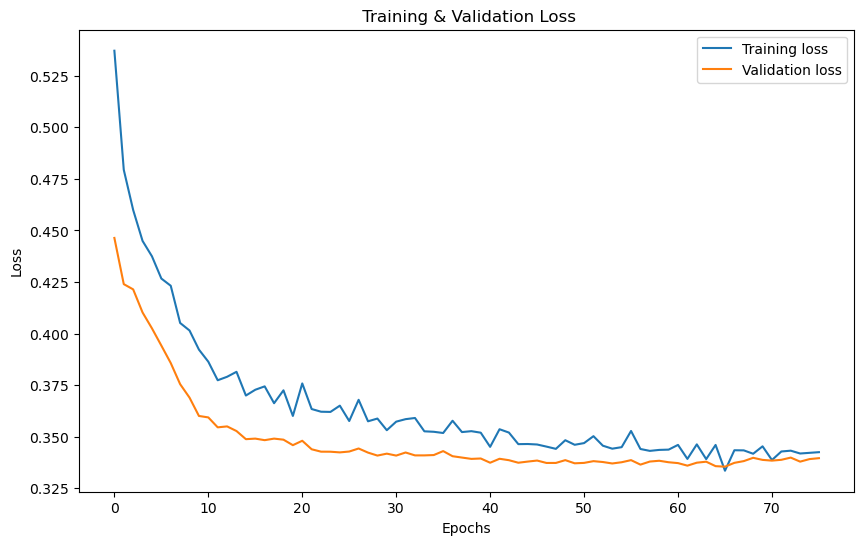

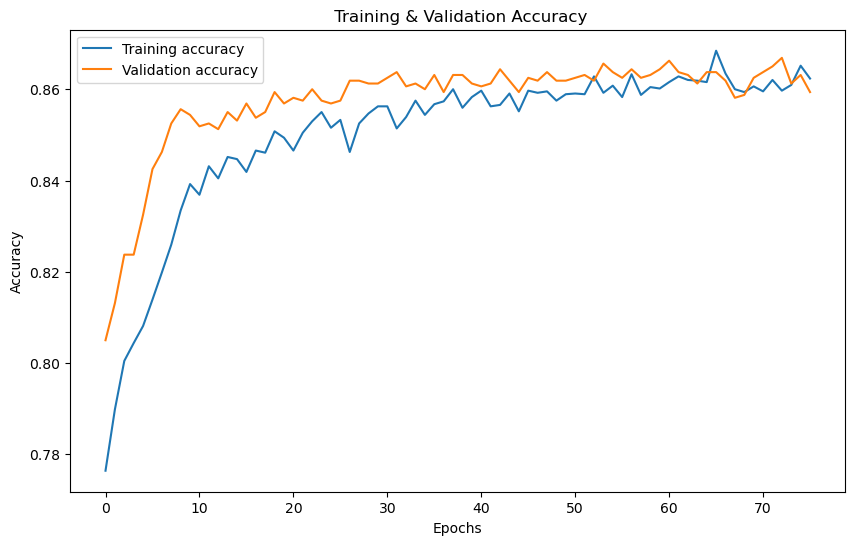

In [98]:
# Plot Tranning history
def plot_history(history, metric):
    plt.figure(figsize=(10,6))
    plt.plot(history.history[metric], label=f'Training {metric}')
    plt.plot(history.history[f'val_{metric}'], label=f'Validation {metric}')
    
    
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.title(f' Training & Validation {metric.capitalize()}')
    plt.legend()
    plt.show()
    
plot_history(history, 'loss')
plot_history(history, 'accuracy')

## Evaluate the Model

In [99]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8581 - loss: 0.3317
Test Loss: 0.3306
Test Accuracy: 0.8610


In [100]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

## Use ANN to Predict Customer Churn

In [101]:
p1 = model.predict(sc.transform([[0, 0, 1, 608, 0, 41, 1, 83807.86, 1, 0, 1, 112542.58]]))
p2 = model.predict(sc.transform([[1, 0, 0, 653, 1, 41, 8, 102768.42, 1, 1, 0, 112542.58]]))
p3 = model.predict(sc.transform([[0, 1, 0, 635, 1, 53, 1, 117005.55, 1, 0, 0, 123646.57]]))
p4 = model.predict(sc.transform([[1, 0, 0, 711, 0, 28, 8, 0, 2, 0, 0, 105159.89]]))

print(p1, p2, p3, p4)

print(p1 <0.5)
print(p2 <0.5)
print(p3 <0.5)
print(p4 <0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[0.18333434]] [[0.21730416]] [[0.91978425]] [[0.02439289]]
[[ True]]
[[ True]]
[[False]]
[[ True]]


## Saving the Model